In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import os
nb_path = os.path.abspath('')
file_path = os.path.join(nb_path, '../../data/df_cleaned.csv')
df = pd.read_csv(file_path)

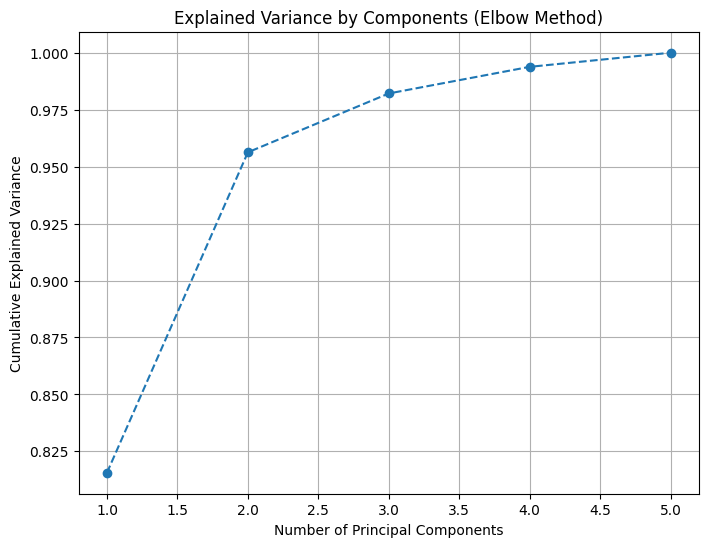

Component 1: 81.56% cumulative explained variance
Component 2: 95.63% cumulative explained variance
Component 3: 98.21% cumulative explained variance
Component 4: 99.38% cumulative explained variance
Component 5: 100.00% cumulative explained variance


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Selecting numerical features
numerical_features = ['cylinders', 'displayments', 'horsepower', 'weight','acceleration']


# Extract the numerical columns from the dataframe
X = df[numerical_features]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(X_scaled)

# Calculate explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Elbow Method: Plot cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components (Elbow Method)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Display explained variance ratios for the components
for i, var in enumerate(cumulative_variance, 1):
    print(f"Component {i}: {var:.2%} cumulative explained variance")


In [ ]:

# Create a DataFrame for the first three principal components
projected_3d_df = pd.DataFrame(pca_result[:, :3], columns=['PC1', 'PC2', 'PC3'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(
    projected_3d_df,
    x='PC1',
    y='PC2',
    z='PC3',
    title='Interactive 3D Projection of the First Three Principal Components',
    opacity=0.7
)

fig.update_layout(
    width=1200,  # Increase width
    height=900,  # Increase height
    title_font=dict(size=20),
)

fig.update_traces(marker=dict(size=3))  # Adjust the size of the data points

# Show the interactive plot
fig.show()


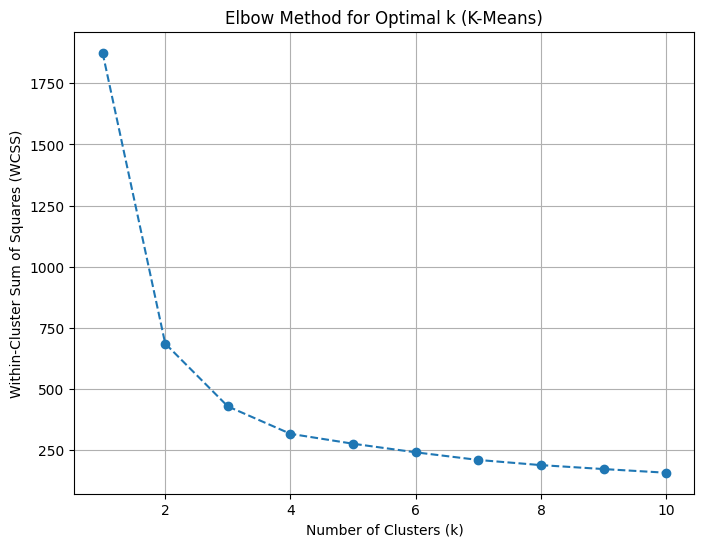

In [ ]:
# Run K-Means for different cluster numbers and store WCSS
wcss = []
k_range = range(1, 11)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_result)  # Using PCA-reduced data
    wcss.append(kmeans.inertia_)  # Store WCSS (inertia)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()


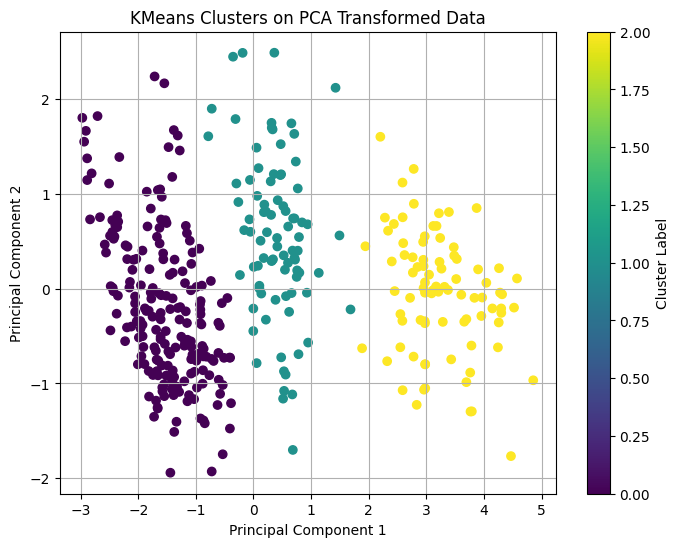

Cluster Centers (in PCA space):
Cluster 1: [-1.54513232e+00 -2.08025642e-01 -9.42230298e-02 -1.15392048e-04
  1.43509974e-02]
Cluster 2: [ 0.39953987  0.54265925  0.1873915  -0.06825298 -0.03278339]
Cluster 3: [ 3.24769107e+00 -5.16219818e-02  3.50186769e-02  6.85253636e-02
 -1.09163645e-03]

Cluster Sizes:
Cluster 0: 203 samples
Cluster 1: 86 samples
Cluster 2: 86 samples


In [ ]:
# KMeans clustering after PCA
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_result = kmeans.fit(pca_result)  # Fit KMeans on PCA results



# Plot the clusters in the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('KMeans Clusters on PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

# Display the cluster centers in the principal component space
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers (in PCA space):")
for i, center in enumerate(cluster_centers, 1):
    print(f"Cluster {i}: {center}")

# Display the number of samples in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("\nCluster Sizes:")
for label, count in zip(unique, counts):
    print(f"Cluster {label}: {count} samples")

# Interactive 3D scatter plot for the first three principal components
fig = px.scatter_3d(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    z=pca_result[:, 2],
    color=kmeans.labels_.astype(str),  # Cluster labels for color
    labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'},
    title='Interactive 3D Scatter Plot of KMeans Clusters on PCA Data'
)

fig.update_layout(
    width=1200,  # Increase width
    height=900,  # Increase height
    title_font=dict(size=20),
)

fig.show()


In [ ]:
df['assigned_cluster'] = kmeans.labels_


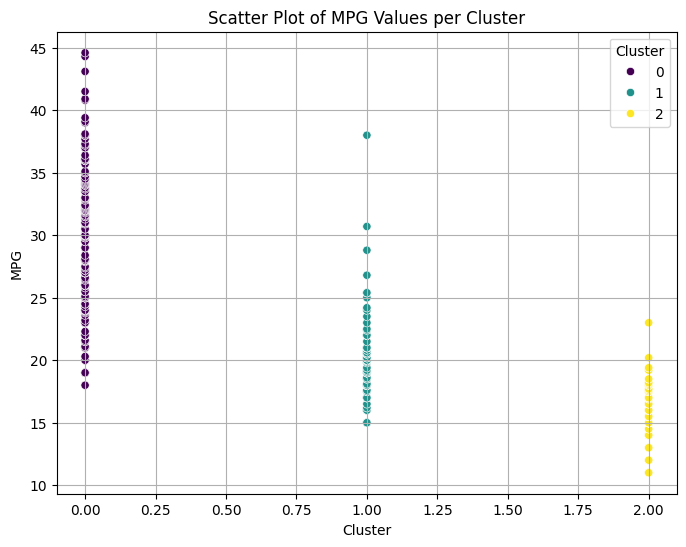

In [ ]:
# Scatter plot of mpg values for each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='assigned_cluster', y='mpg', hue='assigned_cluster', palette='viridis')
plt.title('Scatter Plot of MPG Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('MPG')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
# Step 4: Assign the cluster labels to the DataFrame
# Step 2: Analyze the MPG values within each cluster and their frequency
cluster_summary = df.groupby('assigned_cluster')['mpg'].describe()
cluster_summary

,count,mean,std,min,25%,50%,75%,max
assigned_cluster,,,,,,,,
0,203.0,29.002463,5.513758,18.0,25.0,28.00,32.85,44.6
1,86.0,19.891860,3.554193,15.0,18.0,19.05,21.00,38.0
2,86.0,14.982558,2.252225,11.0,13.0,15.00,16.00,23.0


In [ ]:
# function to assign labels based on the new ranges
def assign_mpg_label(mpg):
    if 11.0 <= mpg <= 18.0:  # Low range
        return 'Low'
    elif 18.0 < mpg <= 24:  # Medium range
        return 'Medium'
    else :                   # High range
        return 'High'


# label function to assign 'Low', 'Medium', or 'High'
df['mpg_label'] = df['mpg'].apply(assign_mpg_label)

instances_per_cluster = df.groupby('mpg_label').size()

print(instances_per_cluster)


df

mpg_label
High      167
Low       110
Medium     98
dtype: int64


,mpg,cylinders,displayments,horsepower,weight,acceleration,model year,origin,car name,outlier,car brand,model,anomaly_score,multivariate_outlier,car_name_encoded,mpg_classes,assigned_cluster,mpg_label
0,11.0,8.0,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega,Normal,oldsmobile,omega,1,Normal,16,0,2,Low
1,11.0,8.0,400.0,150.0,4997.0,14.0,73,1,chevrolet impala,Normal,chevrolet,impala,1,Normal,5,0,2,Low
2,11.0,8.0,318.0,210.0,4382.0,13.5,70,1,dodge d200,Normal,dodge,d200,1,Normal,8,0,2,Low
3,12.0,8.0,350.0,180.0,4499.0,12.5,73,1,oldsmobile vista cruiser,Normal,oldsmobile,vista cruiser,1,Normal,16,0,2,Low
4,12.0,8.0,400.0,167.0,4906.0,12.5,73,1,ford country,Normal,ford,country,1,Normal,10,0,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,40.9,4.0,85.0,58.0,1835.0,17.3,80,2,renault lecar deluxe,Normal,renault,lecar deluxe,1,Normal,21,2,0,High
371,41.5,4.0,98.0,76.0,2144.0,14.7,80,2,vw rabbit,Normal,volkswagen,rabbit,1,Normal,26,2,0,High
372,43.1,4.0,90.0,48.0,1985.0,21.5,78,2,volkswagen rabbit custom diesel,Normal,volkswagen,rabbit custom diesel,1,Normal,26,2,0,High
373,44.3,4.0,90.0,48.0,2085.0,21.7,80,2,vw rabbit c (diesel),Normal,volkswagen,rabbit c (diesel),1,Normal,26,2,0,High


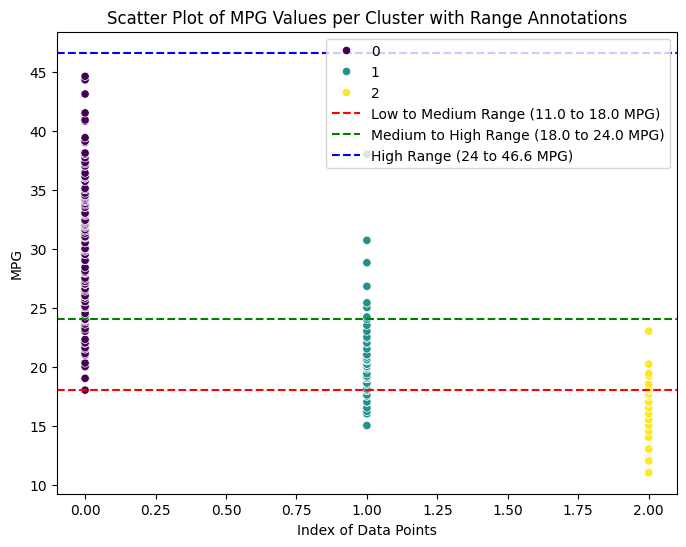

In [ ]:

# Scatter plot of mpg values for each cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='assigned_cluster', y='mpg', hue='assigned_cluster', palette='viridis')


# Add the range values for Low, Medium, and High categories
plt.axhline(y=18, color='r', linestyle='--', label='Low to Medium Range (11.0 to 18.0 MPG)')
plt.axhline(y=24, color='g', linestyle='--', label='Medium to High Range (18.0 to 24.0 MPG)')
plt.axhline(y=46.6, color='b', linestyle='--', label='High Range (24 to 46.6 MPG)')


plt.title('Scatter Plot of MPG Values per Cluster with Range Annotations')
plt.xlabel('Index of Data Points')
plt.ylabel('MPG')
plt.legend()


plt.show()
